## Importing Libraries

In [1]:
# Data Processing
import numpy as np
import pandas as pd

# Basic Visualization tools
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_palette('husl')

plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots# Special Visualization
import wordcloud, missingno
from wordcloud import WordCloud # wordcloud
import missingno as msno # check missing value
import networkx as nx

# Plotly visualization
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



## Importing Data

In [2]:
data = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
data.describe()#numerical

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [4]:
data.describe(include='O') #categorical

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


<AxesSubplot:>

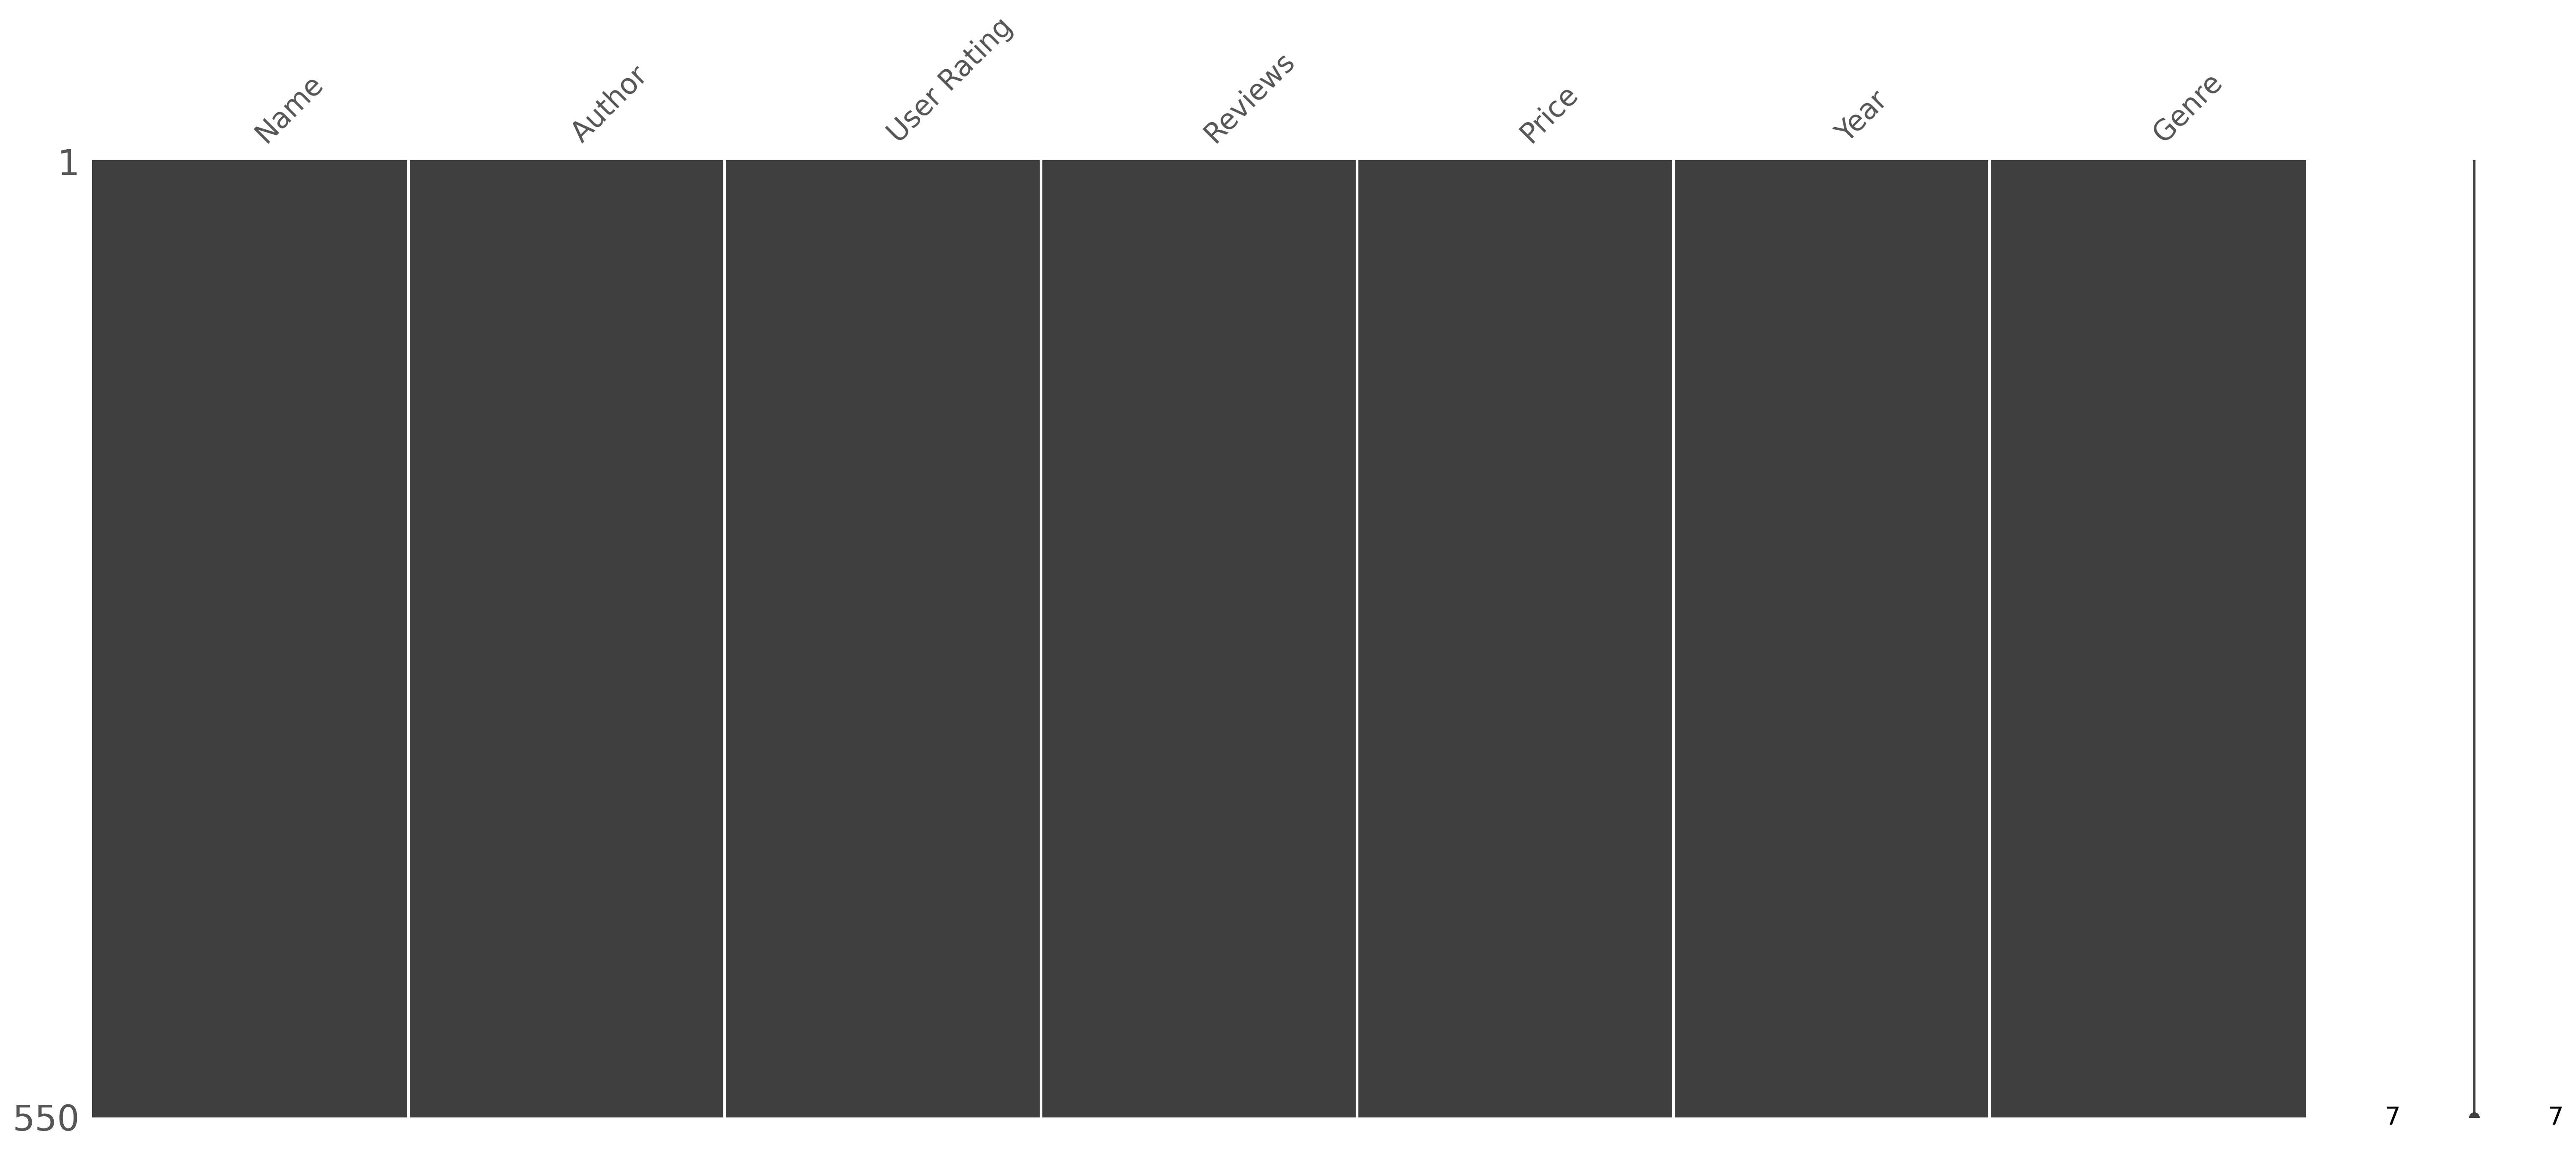

In [5]:
msno.matrix(data)

> The Data has no missing values

## Analyzing Dataset

### BESTSELLERS RATINGS COUNT

In [6]:
temp_df = data['User Rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['User Rating'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'RATINGS COUNT' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

def pie_plot(cnt_srs, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=plt.cm.viridis_r(np.linspace(0, 1, 14)),
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace
bold("**MOST OF THE RATINGS ARE IN THE RANGE OF 4.6 TO 4.8**")
py.iplot([pie_plot(data['User Rating'].value_counts(), 'Rating')])

**MOST OF THE RATINGS ARE IN THE RANGE OF 4.6 TO 4.8**

### Relationship between Price and User Rating

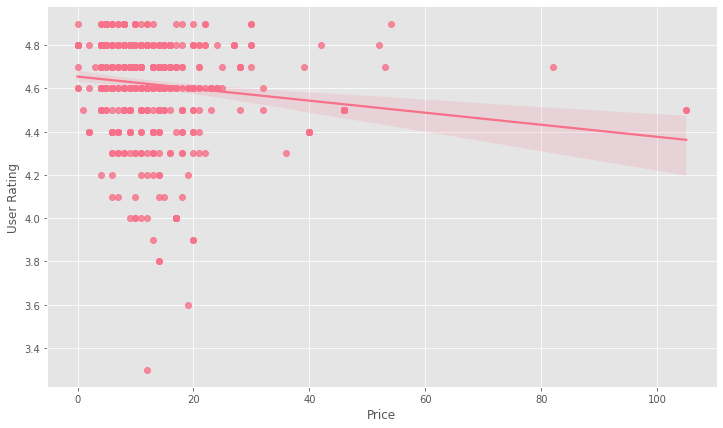

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=data, x='Price', y='User Rating', ax=ax)
plt.show()

* The User Ratings tend to show a slight negative correlation with Price of the Bestselling Book.
* Most of the books are in the 'Less than 50" price range ,so not much conclusion can be drawn.

### Relationship between Price and Reviews

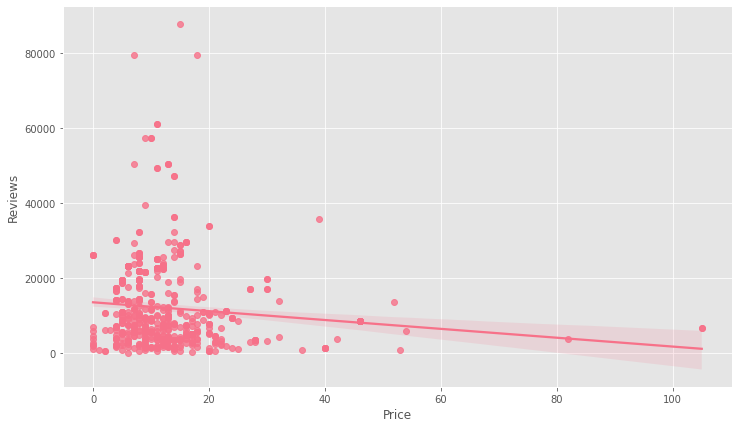

In [8]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=data, x='Price', y='Reviews', ax=ax)
plt.show()

Reviews and Price also tend to show an almost similar correlation as User Rating and Price.But again as most of the Bestsellers are crowded in a lower Price range,we can't conclude much.

### FICTION AND NON-FICTION BESTSELLERS

In [9]:
temp_df = data['Genre'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['Genre'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark", xaxis = dict(title = 'Genre'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

bold("**NON-FICTION BESTSELLERS ARE MORE THAN FICTION**")
py.iplot([pie_plot(data['Genre'].value_counts(), 'GENRE')])

**NON-FICTION BESTSELLERS ARE MORE THAN FICTION**

In [10]:
temp_df1 = data['Year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['Year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'BESTSELLERS COUNT OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()
d1 = data[data["Genre"] == "Fiction"]
d2 = data[data["Genre"] == "Non Fiction"]

col ="Year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="Fiction", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Non Fiction", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'GENRE BASED BESTSELLERS COUNT OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

In [11]:
df1 = data[data["Genre"] == "Fiction"]
df2 = data[data["Genre"] == "Non Fiction"]

temp_df1 = df1['User Rating'].value_counts().reset_index()
temp_df2 = df2['User Rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['User Rating'],
                name="Fiction",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['User Rating'],
                name = "Non Fiction",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'RATING BY GENRE' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()


For ratings less than 4.8,Non-Fiction books count overpowers Fiction books. But the reverse can be seen for the ratings-4.8 and 4.9.This is an important point as ,earlier we have seen that non-fiction books have an overall higher count in the entire dataset.

In [12]:
common_books=data['Name'].value_counts()[:7].rename_axis('Common Books').reset_index(name='count')
fig = px.treemap(common_books, path=['Common Books'], values='count',title='TOP 7 MULTIPLE TIMES BESTSELLERS')

fig.show()

In [13]:
books=data['Name'].value_counts()[data['Name'].value_counts()>5].index
for i in list(books):
    display(data[data['Name']==i])

,Name,Author,User Rating,Reviews,Price,Year,Genre
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction
276,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2014,Non Fiction
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
278,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2016,Non Fiction
279,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2017,Non Fiction
280,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
304,StrengthsFinder 2.0,Gallup,4.0,5069,17,2009,Non Fiction
305,StrengthsFinder 2.0,Gallup,4.0,5069,17,2010,Non Fiction
306,StrengthsFinder 2.0,Gallup,4.0,5069,17,2011,Non Fiction
307,StrengthsFinder 2.0,Gallup,4.0,5069,17,2012,Non Fiction
308,StrengthsFinder 2.0,Gallup,4.0,5069,17,2013,Non Fiction
309,StrengthsFinder 2.0,Gallup,4.0,5069,17,2014,Non Fiction
310,StrengthsFinder 2.0,Gallup,4.0,5069,17,2015,Non Fiction
311,StrengthsFinder 2.0,Gallup,4.0,5069,17,2016,Non Fiction
312,StrengthsFinder 2.0,Gallup,4.0,5069,17,2017,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
250,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2017,Fiction
251,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
477,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2014,Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
479,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2016,Fiction
480,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2017,Fiction
481,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2018,Fiction
482,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
331,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2009,Non Fiction
332,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2011,Non Fiction
333,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2012,Non Fiction
334,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2013,Non Fiction
335,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2015,Non Fiction
336,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2016,Non Fiction
337,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2017,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
375,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2013,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
377,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2016,Non Fiction
378,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2017,Non Fiction
379,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2018,Non Fiction
380,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2019,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2012,Non Fiction
189,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2013,Non Fiction
190,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2014,Non Fiction
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2015,Non Fiction
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2016,Non Fiction


### REVIEWS,RATINGS AND PRICE OF BESTSELLERS

In [14]:
temp_df1 = data.groupby('Year').mean().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['Reviews'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'AVERAGE REVIEWS OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Reviews'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()
temp_df1 = data.groupby('Year').mean().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['Price'],
                marker = dict(color = 'rgb(148, 103, 189)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'AVERAGE PRICE OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Price'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()
temp_df1 = data.groupby('Year').mean().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['User Rating'],
                marker = dict(color = 'rgb(250,13,92)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'AVERAGE RATING OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Rating'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

### GENRE-BASED REVIEWS,RATINGS AND PRICE OF BESTSELLERS

In [15]:
df1 = data[data["Genre"] == "Fiction"]
df2 = data[data["Genre"] == "Non Fiction"]

temp_df1 = df1.groupby('Year').mean().reset_index()
temp_df2 = df2.groupby('Year').mean().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['User Rating'],
                name="Fiction",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['Year'],
                y = temp_df2['User Rating'],
                name = "Non Fiction",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'AVERAGE RATING BY GENRE OVER YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Rating'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()
# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['Reviews'],
                name="Fiction",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['Year'],
                y = temp_df2['Reviews'],
                name = "Non Fiction",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'AVERAGE REVIEWS BY GENRE OVER YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Reviews'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()
# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['Price'],
                name="Fiction",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['Year'],
                y = temp_df2['Price'],
                name = "Non Fiction",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'AVERAGE PRICE BY GENRE OVER YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Price'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

### YEAR BASED ANALYSIS OF REVIEWS,RATINGS AND PRICE OF BESTSELLERS

In [16]:
df1 = data[data["Genre"] == "Fiction"]
df2 = data[data["Genre"] == "Non Fiction"]

temp_df1 = df1.groupby('Year').mean().reset_index()
temp_df2 = df2.groupby('Year').mean().reset_index()

trace1 = go.Scatter(
                    x=temp_df1['Year'], 
                    y=temp_df1['Price'], 
                    name="Fiction", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=temp_df2['Year'], 
                    y=temp_df2['Price'], 
                    name="Non Fiction", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Average Price over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Price'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

trace1 = go.Scatter(
                    x=temp_df1['Year'], 
                    y=temp_df1['User Rating'], 
                    name="Fiction", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=temp_df2['Year'], 
                    y=temp_df2['User Rating'], 
                    name="Non Fiction", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Average Rating over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Rating'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

trace1 = go.Scatter(
                    x=temp_df1['Year'], 
                    y=temp_df1['Reviews'], 
                    name="Fiction", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=temp_df2['Year'], 
                    y=temp_df2['Reviews'], 
                    name="Non Fiction", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Average Reviews over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Reviews'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

### BESTSELLING BOOKS

In [17]:
temp_df1 = data.groupby('Name').mean().reset_index().sort_values('Price',ascending=False).head(10)


# create trace1
trace1 = go.Bar(
                x = temp_df1['Name'],
                y = temp_df1['Price'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 10 HIGHEST PRICED BESTSELLERS ' , xaxis = dict(title = 'Book',tickangle=45), yaxis = dict(title = 'Average Price'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()


# create trace1
trace1 = go.Bar(
                x = temp_df1['Name'],
                y = temp_df1['Reviews'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 10 BESTSELLERS WITH HIGHEST AVERAGE REVIEWS ' , xaxis = dict(title = 'Book',tickangle=45), yaxis = dict(title = 'Average Reviews'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

### FREE BESTSELLERS ANALYZED

In [18]:
df=data[data['Price']==0]
temp_df1 = df['Year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['Year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'FREE BESTSELLERS COUNT OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

No FREE bestsellers in 2012 and after 2017.

In [19]:
temp_df1 = df.groupby('Year').mean().reset_index()



trace1 = go.Scatter(
                    x=temp_df1['Year'], 
                    y=temp_df1['User Rating'], 
                    name="Fiction", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(hovermode= 'closest', title = 'Average Rating Of Free Bestsellers over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Rating'),template= "plotly_dark")
fig = go.Figure(data = [trace1], layout=layout)
fig.show()

trace1 = go.Scatter(
                    x=temp_df1['Year'], 
                    y=temp_df1['Reviews'], 
                    name="Fiction", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(hovermode= 'closest', title = 'Average Reviews Of Free Bestsellers over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Reviews'),template= "plotly_dark")
fig = go.Figure(data = [trace1], layout=layout)
fig.show()

In [20]:
temp_df1 = df.groupby('Author').count().reset_index().sort_values('Name',ascending=False).head(10)


# create trace1
trace1 = go.Bar(
                x = temp_df1['Author'],
                y = temp_df1['Name'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'AUTHORS OF FREE BESTSELLERS ' , xaxis = dict(title = 'Author',tickangle=45), yaxis = dict(title = 'COUNT'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

***